## PERFORMANCE OF MACHINE LEARNING MODELS FOR ECOMMERCE PURCHASE PREDICTION

This project is based on Ecommerce purchase prediction.  This dataset contains various features related to user behavior on an online shopping website, such as the number of pages visited, the duration of the visit, and the type of traffic source. The dataset also includes a binary label indicating whether the user made a purchase or not. The 'Online Shopper Intention Dataset' for this research was downloaded from UCI's Machine Learning Library.

The dataset consists of feature vectors belonging to 12,330 sessions, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping. The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

In [1]:
#import the packages
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
pip install ydata_profiling

     ---------------------------------------- 0.0/357.9 kB ? eta -:--:--
     ------------------------------------- 357.9/357.9 kB 11.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/666.2 kB ? eta -:--:--
     ------------------------------------- 666.2/666.2 kB 21.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/409.3 kB ? eta -:--:--
     ------------------------------------- 409.3/409.3 kB 24.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
     ------------------------------------- 296.5/296.5 kB 19.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/104.8 kB ? eta -:--:--
     ---------------------------------------- 104.8/104.8 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
     ------------------------------------- 300.0/300.0 kB 18.1 MB


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ydata_profiling import ProfileReport

ImportError: cannot import name 'Buffer' from 'typing_extensions' (C:\ProgramData\anaconda3\lib\site-packages\typing_extensions.py)

In [4]:
#Loading and preview the data set
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## DATA STRUCTURE AND STATISTICAL ANALYSIS 

Description of the columns:

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

Administrative - the number of pages of this type (administrative) that the user visited. Administrative_Duration - the amount of time spent in this category of pages. Informational - the number of pages of this type (informational) that the user visited. Informational_Duration - the amount of time spent in this category of pages. ProductRelated - the number of pages of this type (product related) that the user visited. ProductRelated_Duration - the amount of time spent in this category of pages.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. BounceRates - the percentage of visitors who enter the website through that page and exit without triggering any additional tasks. ExitRates - the percentage of pageviews on the website that end at that specific page. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. SpecialDay - This value represents the closeness of the browsing date to special days or holidays (eg. Mother's Day or Valentin's day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [5]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
#Checking the shape of the dataset
df.shape

(12330, 18)

In [7]:
# Descriptive statiscics (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
#Checking null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
#Checking data types
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
#Coun unique numbers in each column
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [11]:
#Show column names
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [12]:
# Checking unique values of categorical column
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

## Data cleansing and preprocessing

### Dimensionality reduction 

Drop three columns 'Administrative', 'Informational', and 'ProductRelated' because their information is already captured by another column "PageValues." Therefore, these columns were considered redundant and not useful for the analysis.

In [13]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

In [14]:
len(df.columns)

15

In [15]:
#Cheking duplicates
df.duplicated().sum()

173

In [16]:
# See duplicated data
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

       Administrative_Duration  Informational_Duration  \
158                        0.0                     0.0   
159                        0.0                     0.0   
178                        0.0                     0.0   
330                        0.0                     0.0   
356                        0.0                     0.0   
...                        ...                     ...   
11939                      0.0                     0.0   
12159                      0.0                     0.0   
12180                      0.0                     0.0   
12185                      0.0                     0.0   
12301                      0.0                     0.0   

       ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
158                        0.0          0.2        0.2         0.0   
159                        0.0          0.2        0.2         0.0   
178                        0.0          0.2        0.2         0.0   
330                    

Duplicated data need to be removed because it can cause bias and affect the accuracy of the model and leads to inaccurate prediction

In [17]:
# Drop the duplicated values 
df.drop_duplicates(inplace=True)

### Label encoding 

In the dataset, there are some columns with categorical variables, such as 'Month', 'VisitorType', 'OperatingSystem', and 'Browser'. We need to convert  these categorical variables into numerical format. Label encoding assigns a unique numerical value to each category of a variable. For example, for the 'Month' column, we can assign a numerical value of 1 for January, 2 for February, and so on. Label encoding is suitable for categorical variables that have a natural ordering, such as 'Month' and 'VisitorType'. 

In [18]:
cat_col=['Weekend','Revenue']
for col in cat_col:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])

Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [19]:
# Check the unique values in the "Month" column
unique_months = df['Month'].unique()
print(unique_months)

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [20]:
df['Month'] = df['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [21]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


### Check distibution before scaling 

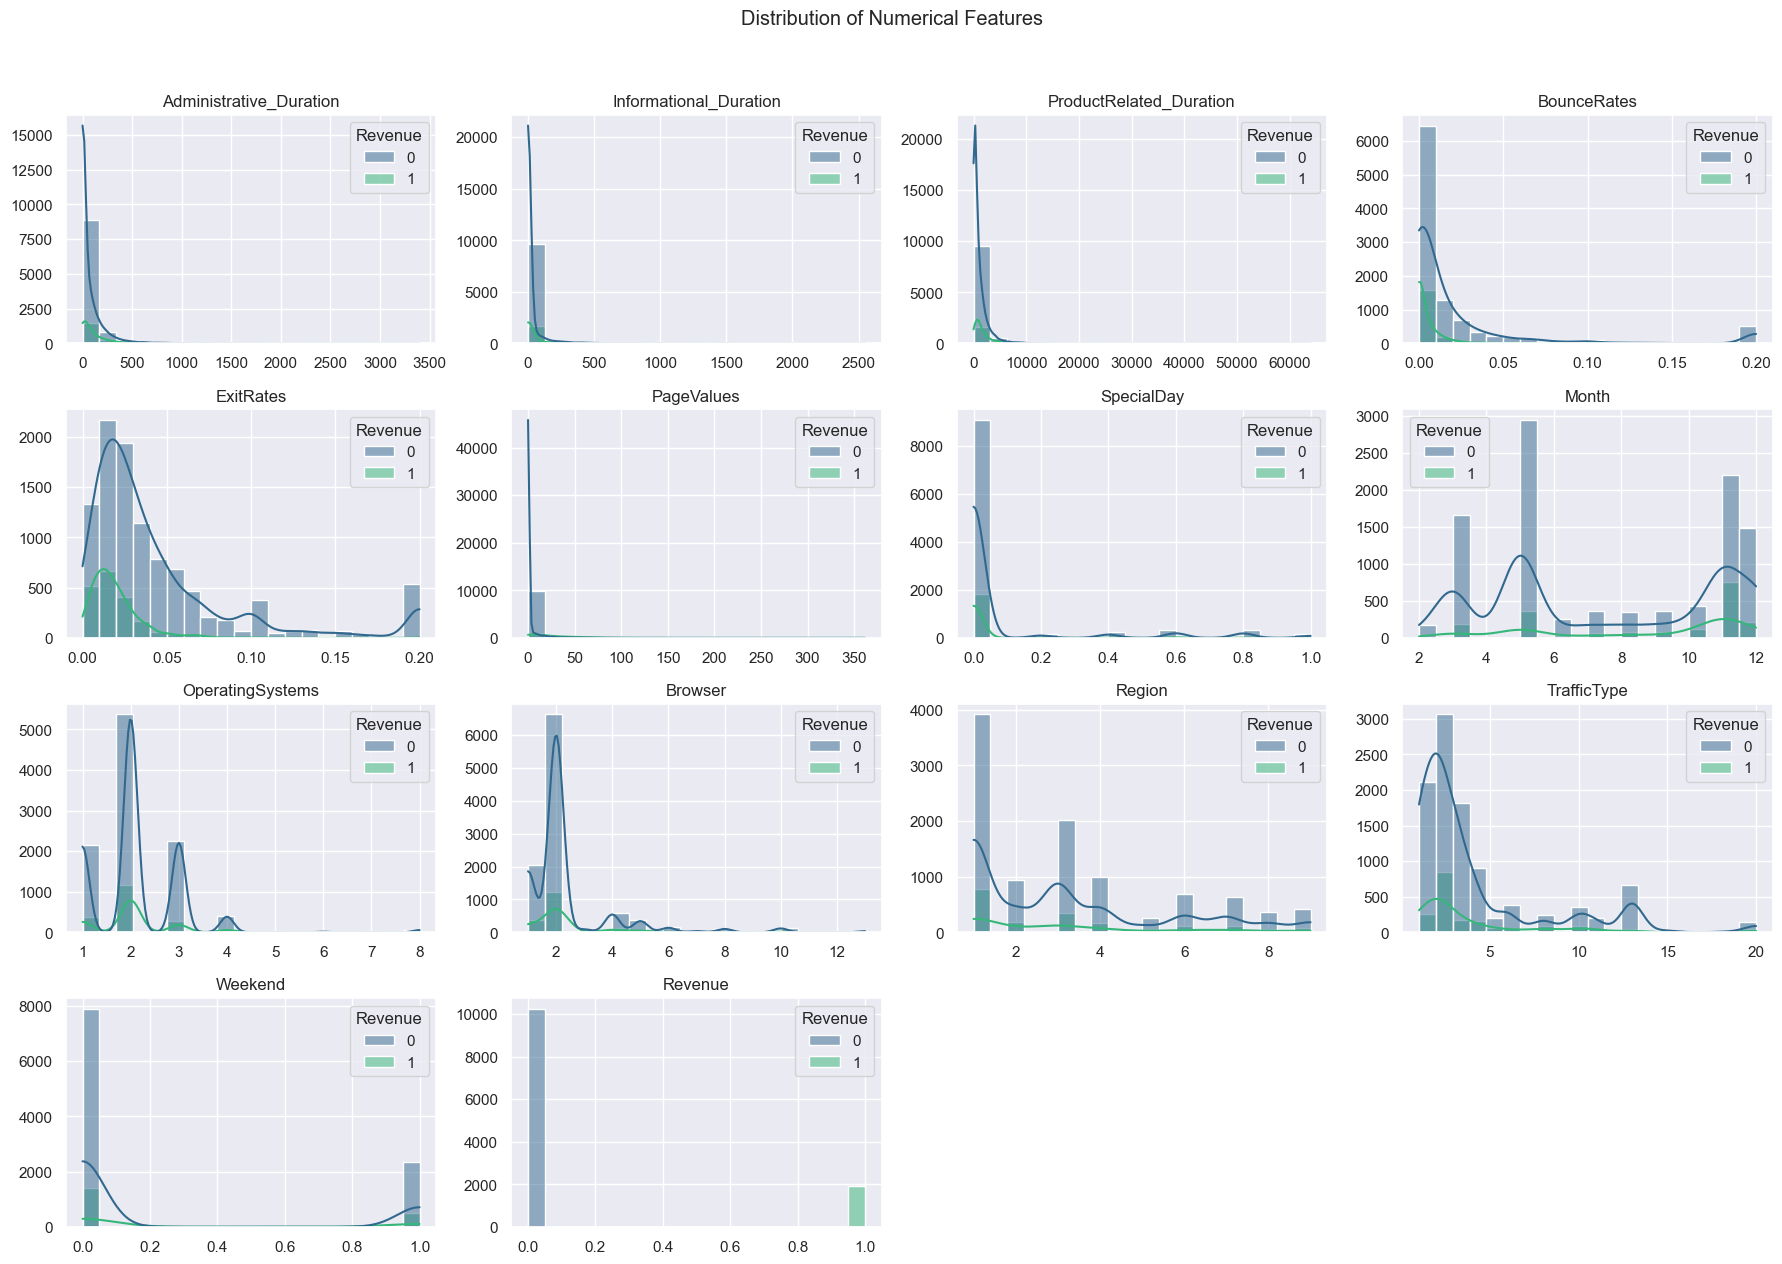

In [22]:
# Selecting numerical features
num_col = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Set up the layout for subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 15))
fig.suptitle('Distribution of Numerical Features', y=1.02)

# Plotting histograms for each numerical feature
for i, feature in enumerate(num_col):
    row, col = i // 4, i % 4
    sns.histplot(df, x=feature, bins=20, kde=True, ax=axes[row, col], hue='Revenue', palette='viridis')
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Remove empty subplots
for i in range(len(num_col), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

plt.show()

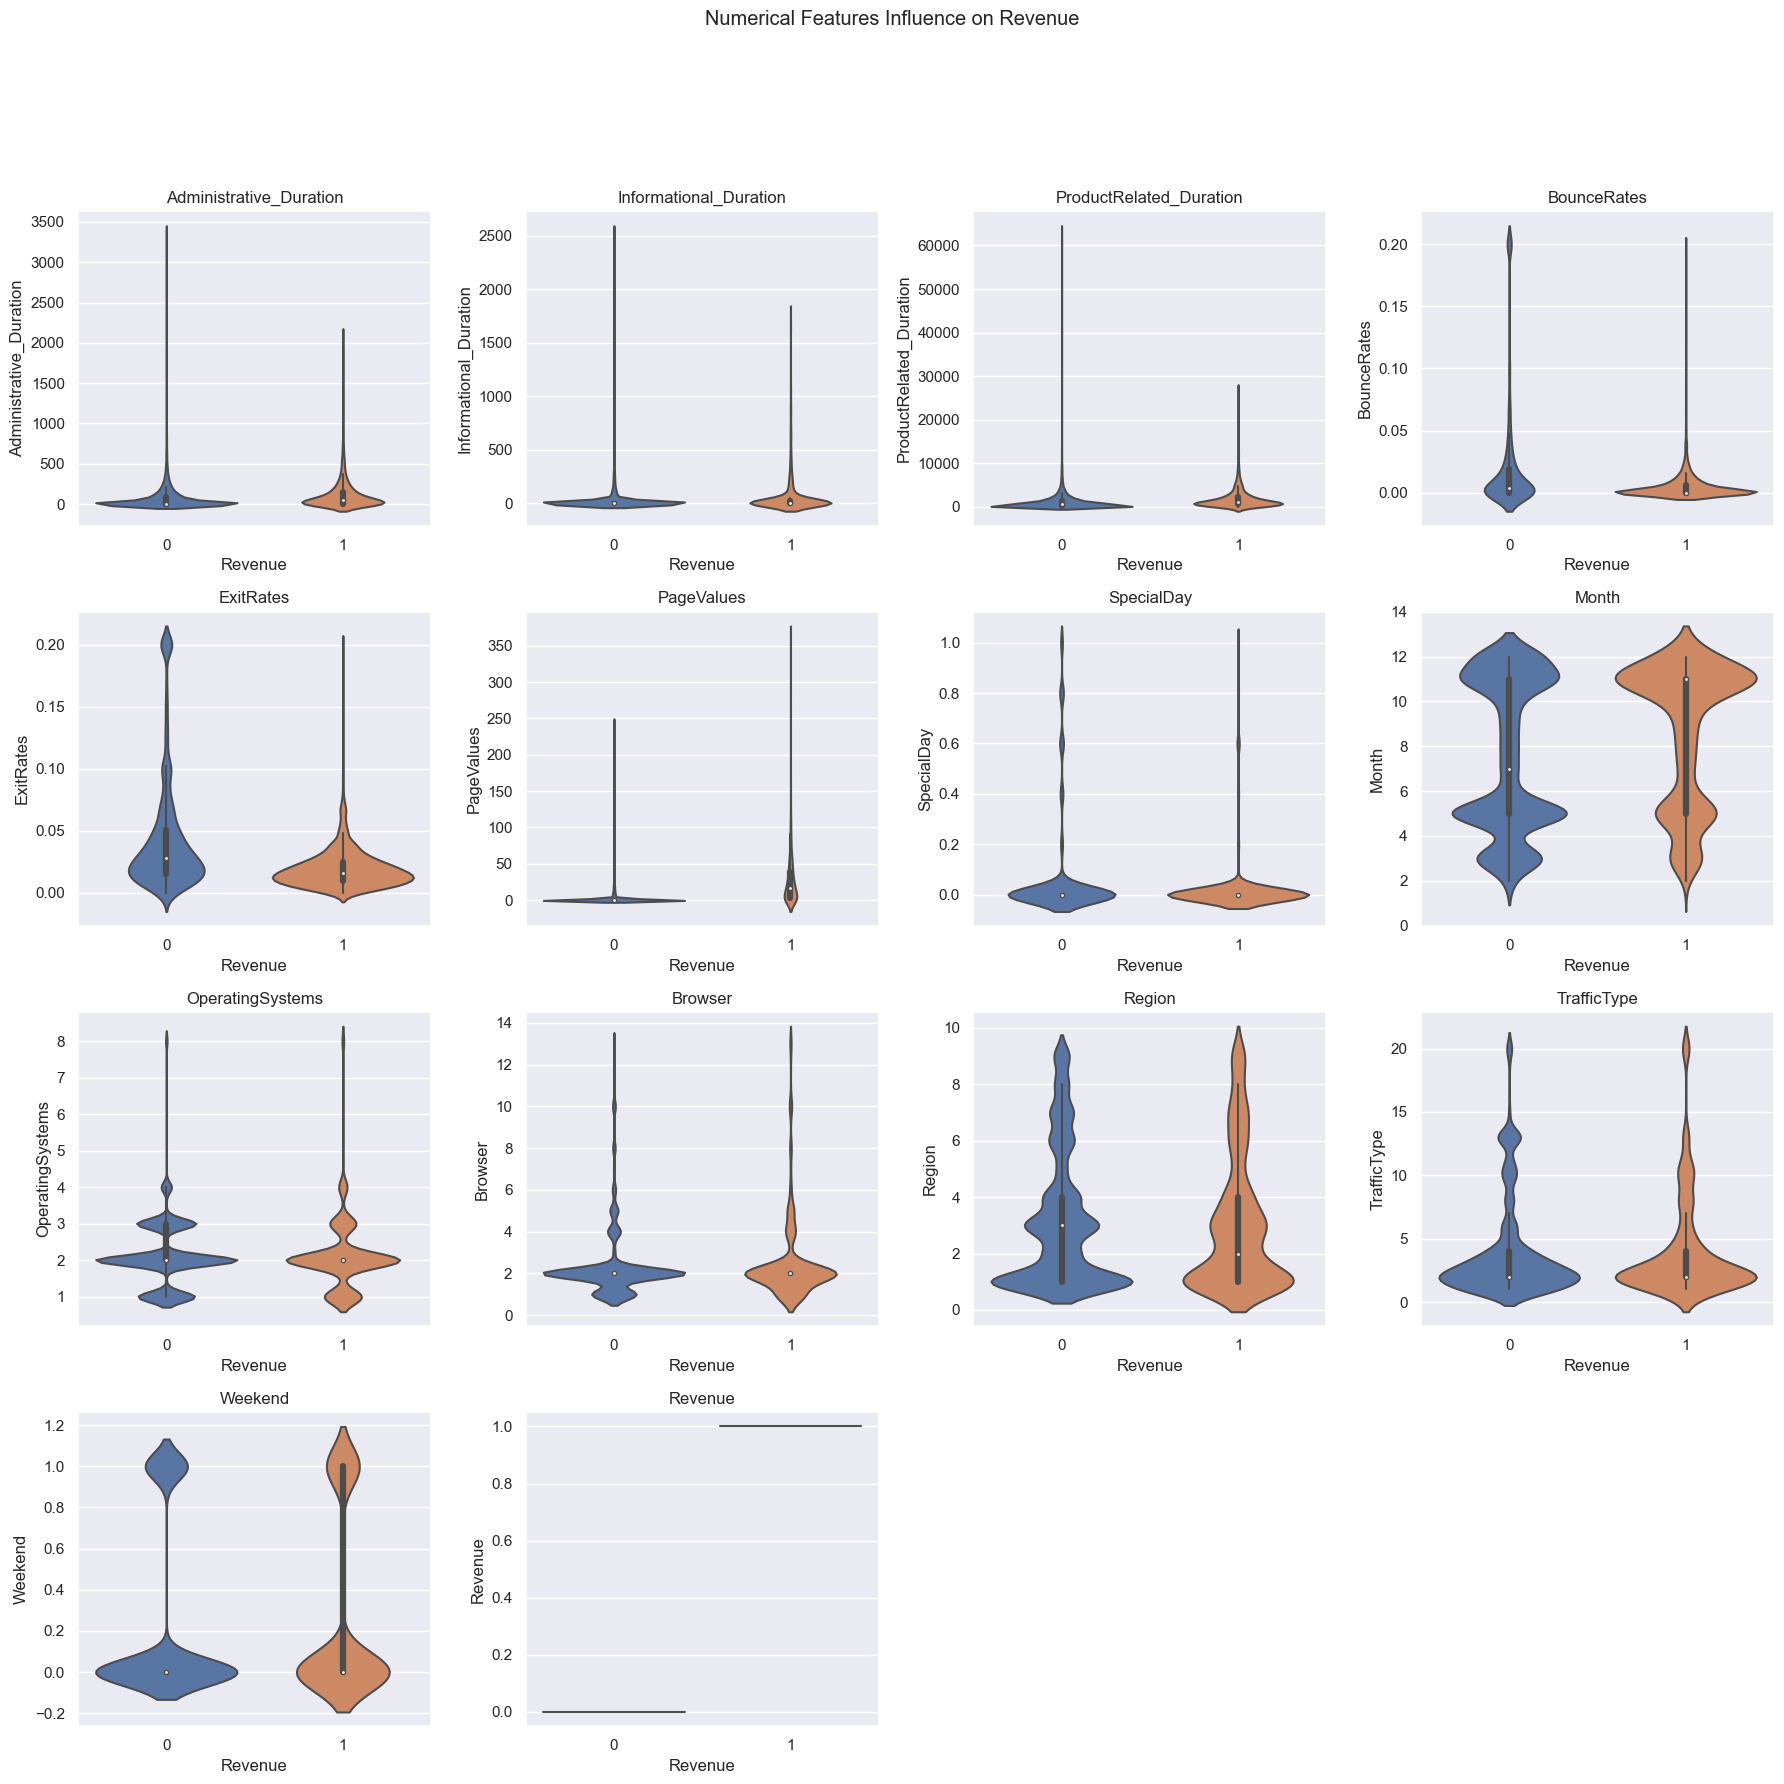

In [23]:
# Selecting numerical features
num_col = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Set up the layout for subplots
plt.figure(figsize=(18, 18))
plt.suptitle('Numerical Features Influence on Revenue', y=1.02)

# Plotting boxplots for each numerical feature against Revenue
for i, col in enumerate(num_col):
    plt.subplot(4, 4, i+1)
    sns.violinplot(x='Revenue', y=col, data=df)
    plt.title(col)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Scale Data with MinMaxScaler 

The MinMaxScaler is a preprocessing method used to rescale the values within a feature to fall between 0 and 1. Its purpose is to standardize the scale of all features, preventing any single feature from disproportionately influencing distance-based algorithms within a model.

In [24]:
# Scale col that have continuous value
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [25]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [26]:
# See the unique values of the column "VisitorType" 
unique_visitor_types = df['VisitorType'].unique()
print(unique_visitor_types)

['Returning_Visitor' 'New_Visitor' 'Other']


## EXPLORATORY DATA ANALYSIS AND DATA VISUALISATION

### Monthly visitor trends bar chart

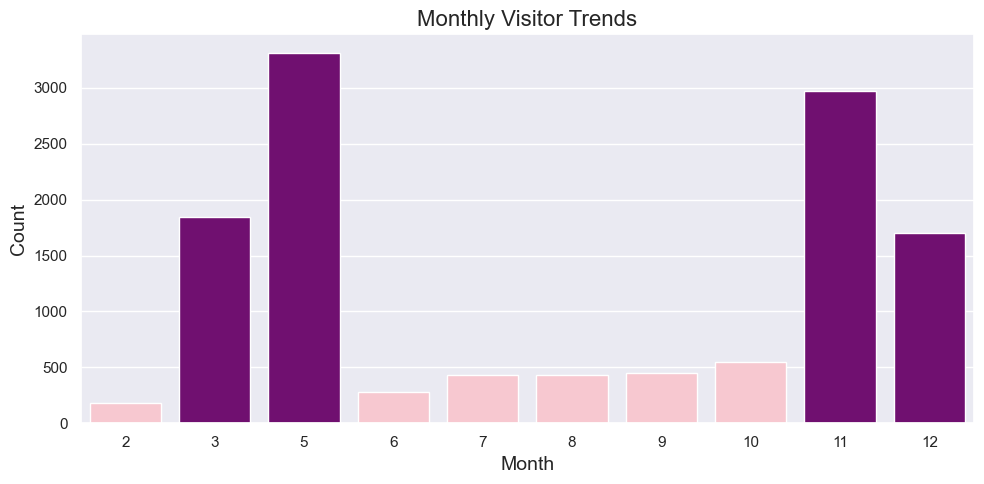

In [27]:
# Calculate count for each month
month_counts = df['Month'].value_counts().sort_index()

# Normalize the count values
normalized_counts = (month_counts - month_counts.min()) / (month_counts.max() - month_counts.min())

# Sort the counts in descending order
sorted_counts = normalized_counts.sort_values(ascending=False)

# Set color palette based on top 4 and other counts
colors = ['purple' if month in sorted_counts[:4] else 'pink' for month in normalized_counts.index]

# Create a bar plot with colored bars
plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values, palette=colors)

# Set title and labels
plt.title('Monthly Visitor Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

### Bar plot of Visitor Type

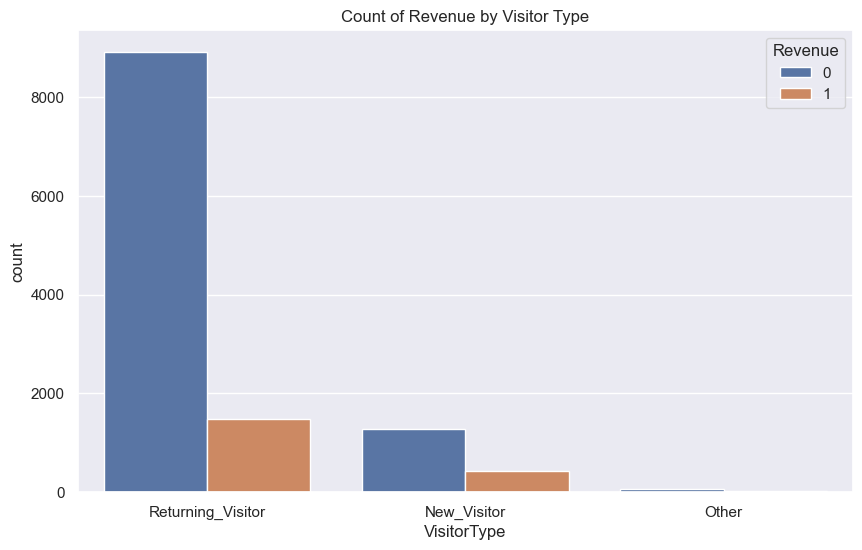

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title('Count of Revenue by Visitor Type')
plt.show()

### Line chart for purchase activities

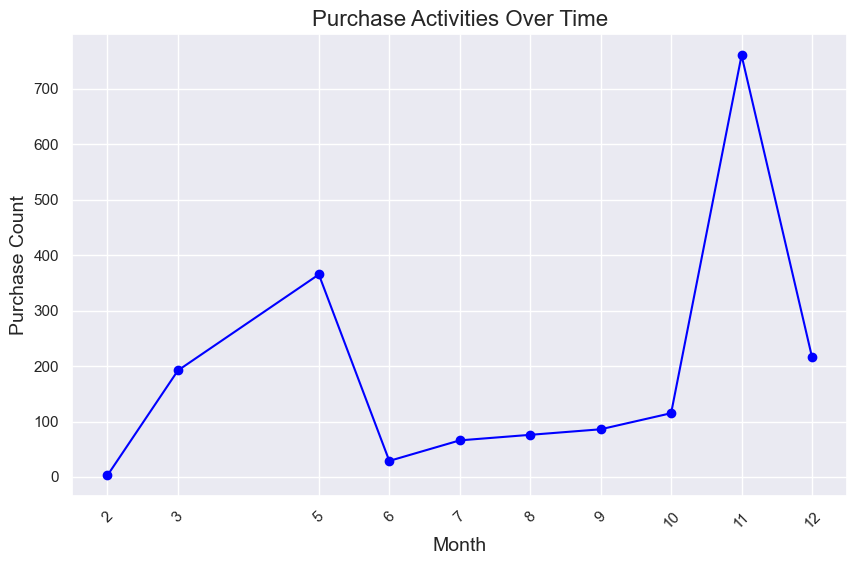

In [29]:
# First, group the data by date and sum the revenue for each date
purchase_data = df.groupby('Month')['Revenue'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(purchase_data['Month'], purchase_data['Revenue'], marker='o', color='blue', linestyle='-')

# Set title and labels
plt.title('Purchase Activities Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Purchase Count', fontsize=14)

# Show all values on the x-axis without skipping labels
plt.xticks(purchase_data['Month'], rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [30]:
# Group the data by traffic type
grouped_data = df.groupby('TrafficType')

# Calculate average revenue per traffic type
average_revenue = grouped_data['Revenue'].mean()

# Calculate total revenue per traffic type
total_revenue = grouped_data['Revenue'].sum()

# Compare revenue across traffic types
revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})

# Print the revenue comparison
print(revenue_comparison)

             Average Revenue  Total Revenue
TrafficType                                
1                   0.110455            262
2                   0.216624            847
3                   0.090000            180
4                   0.155075            165
5                   0.215385             56
6                   0.119910             53
7                   0.300000             12
8                   0.277778             95
9                   0.097561              4
10                  0.200000             90
11                  0.190283             47
12                  0.000000              0
13                  0.060140             43
14                  0.153846              2
15                  0.000000              0
16                  0.333333              1
17                  0.000000              0
18                  0.000000              0
19                  0.058824              1
20                  0.259067             50


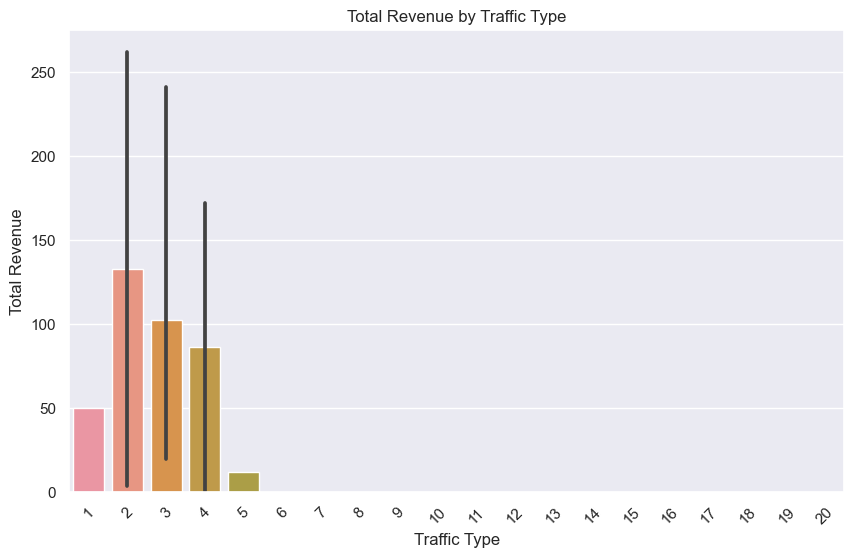

In [31]:
# Sort the revenue comparison dataframe in descending order based on the revenue metric
revenue_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Visualize the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_comparison, x=df['TrafficType'], y='Total Revenue')
plt.title('Total Revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Traffic from Traffic Type 2, 3, and 4 contributes the most to the total revenue, suggesting that these sources bring the most valuable traffic to the website. Therefore, it's crucial to prioritize optimizing and increasing traffic from Traffic Type 2 and Traffic Type 3, as they have proven to be the most profitable revenue sources for the website.

IndexError: index 3 is out of bounds for axis 0 with size 3

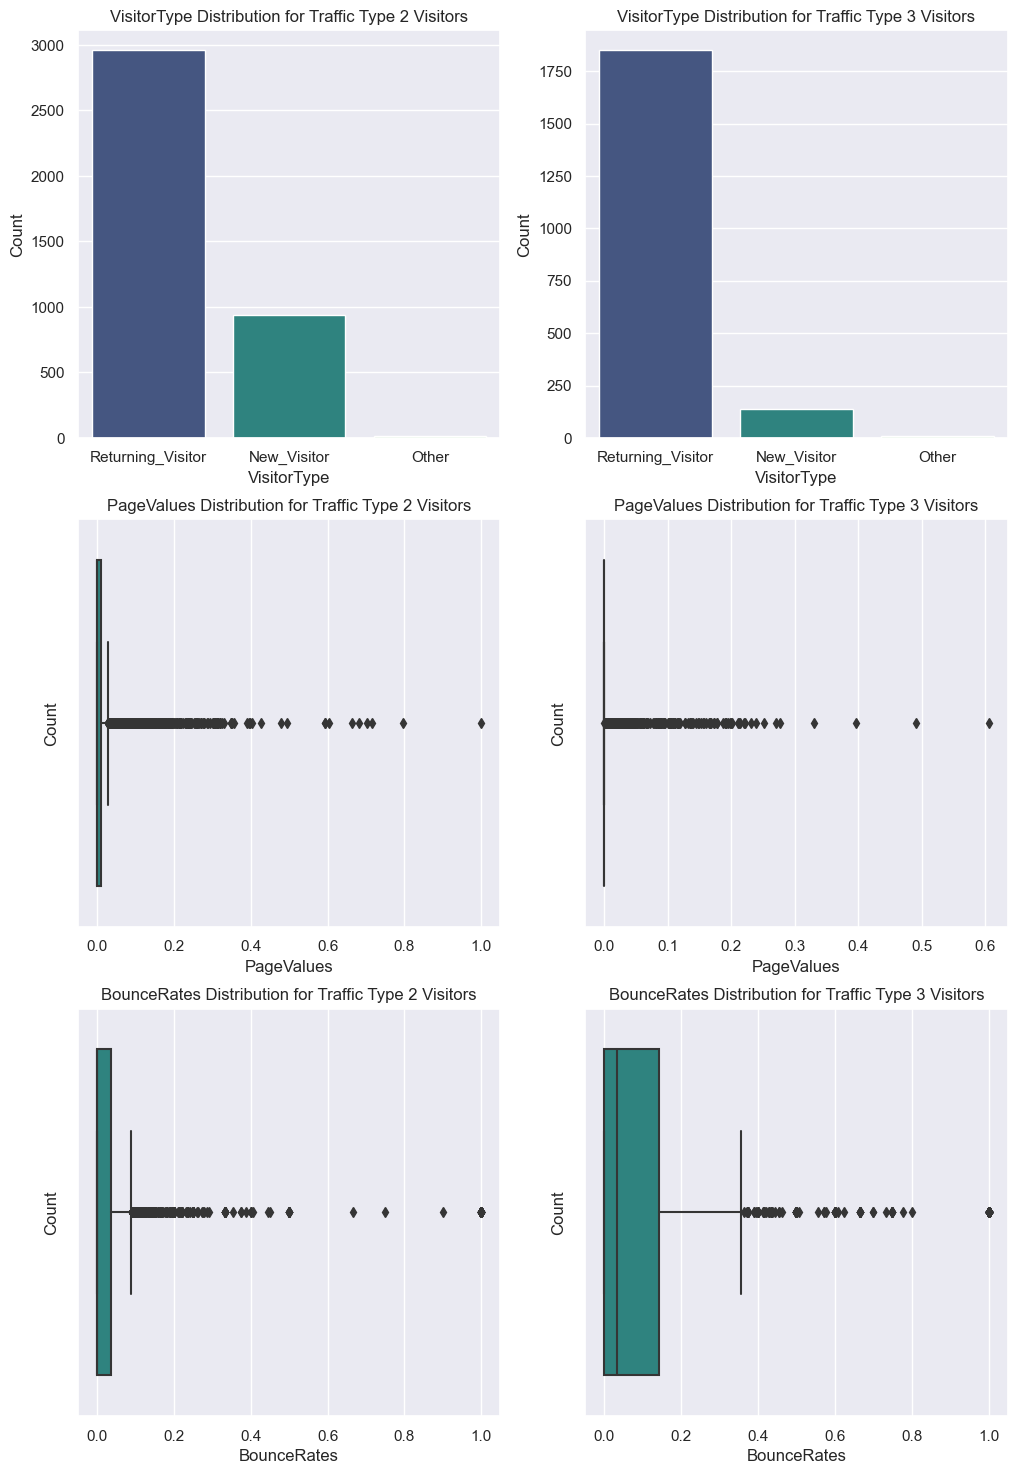

In [32]:
# Filter the dataset for Traffic Type 2 visitors
traffic_type_2_data = df[df['TrafficType'] == 2]

# Filter the dataset for Traffic Type 3 visitors
traffic_type_3_data = df[df['TrafficType'] == 3]

# Set up subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Demographic analysis
demographic_variables = ['VisitorType']

for i, variable in enumerate(demographic_variables):
    sns.countplot(data=traffic_type_2_data, x=variable, palette='viridis', ax=axs[i, 0])
    axs[i, 0].set_title(f'{variable} Distribution for Traffic Type 2 Visitors')
    axs[i, 0].set_xlabel(variable)
    axs[i, 0].set_ylabel('Count')

    sns.countplot(data=traffic_type_3_data, x=variable, palette='viridis', ax=axs[i, 1])
    axs[i, 1].set_title(f'{variable} Distribution for Traffic Type 3 Visitors')
    axs[i, 1].set_xlabel(variable)
    axs[i, 1].set_ylabel('Count')

# Behavioral analysis
behavioral_variables = ['PageValues', 'BounceRates', 'ExitRates']

for i, variable in enumerate(behavioral_variables):
    sns.boxplot(data=traffic_type_2_data, x=variable, palette='viridis', ax=axs[i+len(demographic_variables), 0])
    axs[i+len(demographic_variables), 0].set_title(f'{variable} Distribution for Traffic Type 2 Visitors')
    axs[i+len(demographic_variables), 0].set_xlabel(variable)
    axs[i+len(demographic_variables), 0].set_ylabel('Count')

    sns.boxplot(data=traffic_type_3_data, x=variable, palette='viridis', ax=axs[i+len(demographic_variables), 1])
    axs[i+len(demographic_variables), 1].set_title(f'{variable} Distribution for Traffic Type 3 Visitors')
    axs[i+len(demographic_variables), 1].set_xlabel(variable)
    axs[i+len(demographic_variables), 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

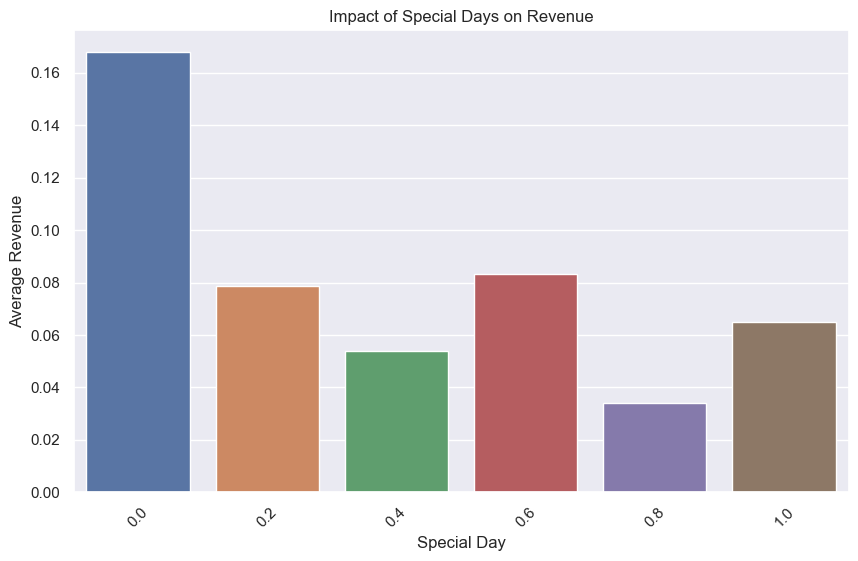

Special Days with the Highest Impact on the Revenue:
- 0.0: 0.16779692082111436
- 0.6: 0.0830945558739255
- 0.2: 0.07865168539325842


In [33]:
# Group the data by 'SpecialDay' and calculate the average revenue or visitor count
special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean()

# Sort the data in descending order based on the average revenue or visitor count
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Visualize the impact of special days on customer engagement
plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Impact of Special Days on Revenue")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue" ) 
plt.xticks(rotation=45)
plt.show()

# Identify top 3 special days by revenue
top_special_days = special_day_analysis.head(3) 
print("Special Days with the Highest Impact on the Revenue:")
for day, impact in top_special_days.items():
    print(f"- {day}: {impact}")

###  Correlation matrix - Heatmap

C:\Users\s3063766\AppData\Local\Temp\ipykernel_2780\2691037861.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


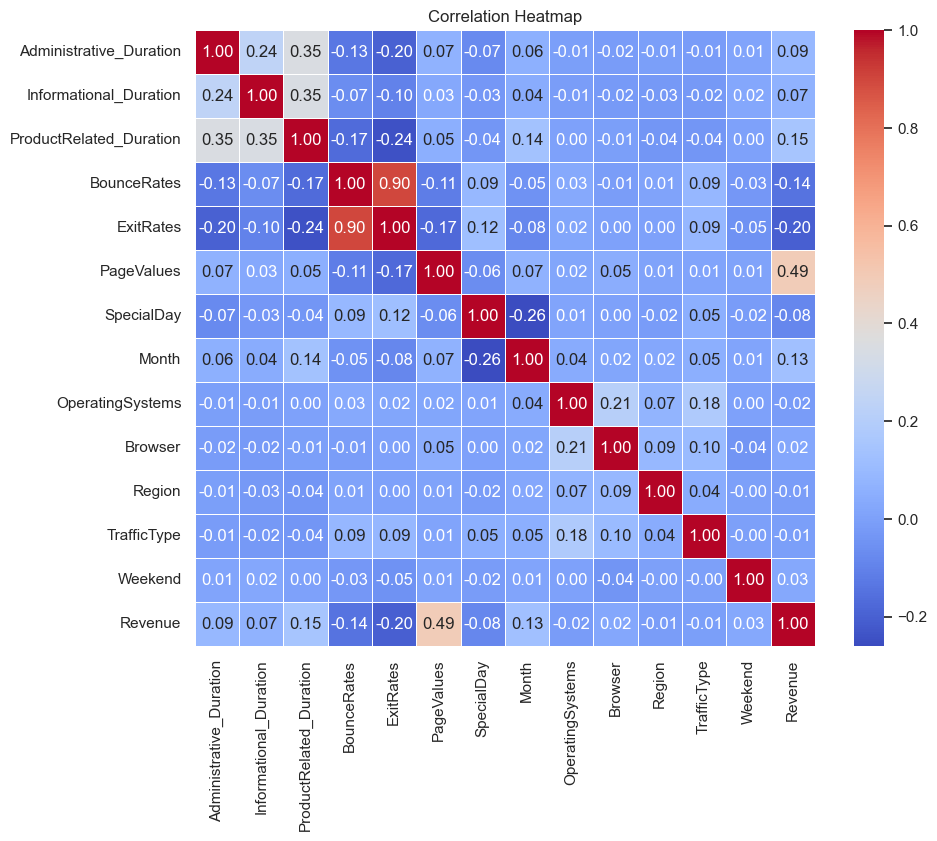

In [34]:
corr=df.corr()
# Set figure size
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Distribution of revenue

The next visualization aids in grasping the spread of the target variable, specifically the revenue class. In binary classification scenarios such as this, maintaining a balanced distribution of classes is crucial. Here, we notice an imbalance in classes, which may result in a biased model that underperforms on the less represented class.

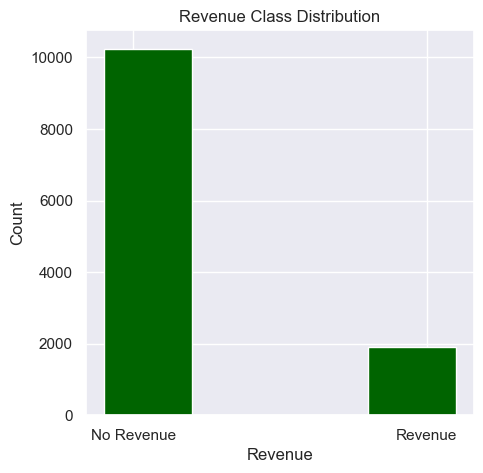

In [35]:
plt.figure(figsize=(5, 5))
plt.hist(df['Revenue'], bins=[-0.1, 0.2, 0.8, 1.1], color='darkgreen')  # Three bins: -0.5 to 0.25, 0.25 to 0.75, 0.75 to 1.25

plt.title('Revenue Class Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Revenue', 'Revenue'])  # Adjust x-axis ticks
plt.show()

### Scatter plot 

We notice a consistent pattern: as page values increase, bounce rates typically decrease. This pattern suggests that users are inclined to stay longer on a website when the page offers valuable information or products. However, there are instances where both page values and bounce rates are low, indicating the presence of other influencing factors.

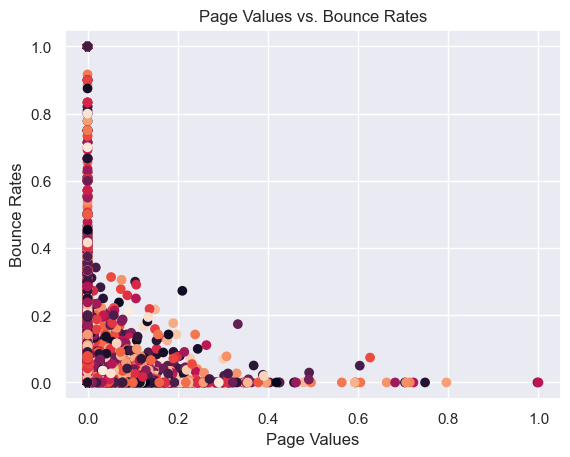

In [36]:
N=len(df)
colors = np.random.rand(N)
plt.scatter(df['PageValues'], df['BounceRates'],c=colors)
plt.title('Page Values vs. Bounce Rates')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()

### Boxplot to visualize distribution of features by Revenue

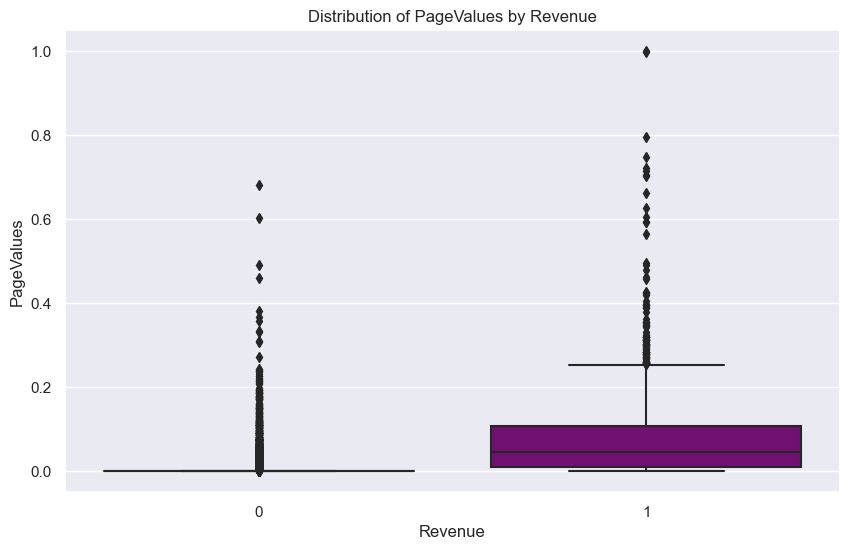

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Revenue', y='PageValues', data=df, palette=['purple'])
plt.title('Distribution of PageValues by Revenue')
plt.show()

### Countplot to visualize distribution of revenue by month
 

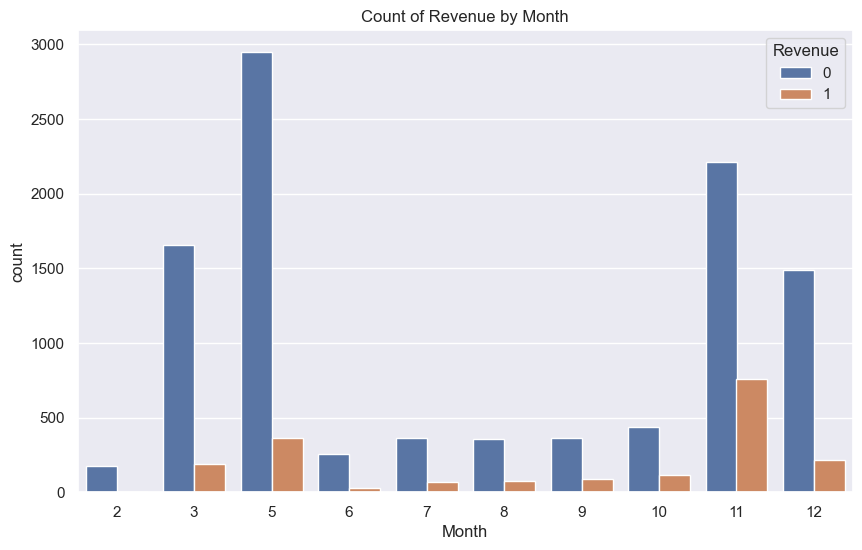

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Revenue', data=df)
plt.title('Count of Revenue by Month')
plt.show()

# Developing and Evaluating Model 

### Splitting the data

In [40]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [41]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

### Handling Class Imbalance 

In [43]:
# Check the frequency of each unique value in the 'Revenue' column
df['Revenue'].value_counts()

0    10249
1     1908
Name: Revenue, dtype: int64

In [44]:
# Check the frequency of each unique value of the target variable of training part of dataset
y_train.value_counts()

0    8199
1    1526
Name: Revenue, dtype: int64

In [45]:
# Check the frequency of each unique value of the target variable of testing part of dataset
y_test.value_counts()

0    2050
1     382
Name: Revenue, dtype: int64

In [46]:
# See the number of rows and the number of columns
X_train.shape

(9725, 14)

In [47]:
X_test.shape

(2432, 14)

In [48]:
# Select the first 10 rows 
X_train[:10]

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2811,0.000000,0.000000,0.006888,0.078947,0.232456,0.000000,0.4,5,2,5,3,3,Returning_Visitor,0
4466,0.007473,0.000000,0.046246,0.027027,0.109234,0.015693,0.4,5,2,5,2,3,Returning_Visitor,0
10593,0.031543,0.000000,0.008023,0.000000,0.060150,0.048502,0.0,11,2,2,1,10,Returning_Visitor,0
12153,0.000000,0.000000,0.004357,0.142857,0.214286,0.000000,0.0,12,3,2,1,20,New_Visitor,0
8359,0.000000,0.000000,0.018226,0.129630,0.222222,0.000000,0.0,12,2,5,3,1,Returning_Visitor,1
8743,0.042221,0.118853,0.034389,0.041667,0.138327,0.000000,0.0,11,1,1,1,2,Returning_Visitor,1
11400,0.003089,0.103849,0.157014,0.025126,0.115901,0.000000,0.0,12,2,2,1,2,Returning_Visitor,0
8840,0.019247,0.000000,0.029771,0.024242,0.130303,0.000000,0.0,11,1,1,2,8,Returning_Visitor,0
10633,0.000000,0.000000,0.001485,0.333333,0.666667,0.000000,0.0,11,1,1,9,3,Returning_Visitor,0
8426,0.000000,0.000000,0.010872,0.000000,0.500000,0.000000,0.0,11,2,2,4,1,Returning_Visitor,0


#### SMOTE technique to handle the class imbalance

SMOTE (Synthetic Minority Over-sampling Technique) is a valuable technique for addressing class imbalance because it effectively enhances the representation of the minority class in the dataset, leading to more robust and accurate machine learning models. It creates new instances of the minority class by interpolating between existing minority class instances, thereby increasing the representation of the minority class in the dataset. By generating synthetic samples rather than simply duplicating existing ones, SMOTE helps to avoid overfitting that can occur when the same minority class samples are repeatedly used during training. 

In [49]:
# Install the library
!pip install imbalanced-learn

     ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
     ------------------ ------------------- 122.9/258.0 kB 2.4 MB/s eta 0:00:01
     -------------------------------------  256.0/258.0 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 258.0/258.0 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Apply SMOTE on the encoded features and target variable
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Convert the resampled target variable to a pandas Series
y_sm = pd.Series(y_sm)

In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [53]:
# Check the number of classes in training Data
y_train.value_counts()

0    8199
1    8199
Name: Revenue, dtype: int64

In [54]:
y_test.value_counts()

0    2050
1    2050
Name: Revenue, dtype: int64

## Choosing machine learning models

We will use LazyPredict library for a quick evaluation a range of machine learning models on the dataset. It automates the process of building, training, and evaluating multiple models, providing insights into how different algorithms perform on your data.

In [55]:
# Install the library 
!pip install lazypredict

     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
      --------------------------------------- 1.4/99.8 MB 41.9 MB/s eta 0:00:03
     - -------------------------------------- 4.0/99.8 MB 51.1 MB/s eta 0:00:02
     -- ------------------------------------- 7.2/99.8 MB 57.4 MB/s eta 0:00:02
     --- ------------------------------------ 9.2/99.8 MB 53.3 MB/s eta 0:00:02
     ---- ---------------------------------- 11.0/99.8 MB 54.7 MB/s eta 0:00:02
     ----- --------------------------------- 13.1/99.8 MB 50.4 MB/s eta 0:00:02
     ----- --------------------------------- 15.2/99.8 MB 46.7 MB/s eta 0:00:02
     ------ -------------------------------- 17.3/99.8 MB 43.5 MB/s eta 0:00:02
     ------- ------------------------------- 19.4/99.8 MB 43.5 MB/s eta 0:00:02
     -------- ------------------------------ 21.6/99.8 MB 43.7 MB/s eta 0:00:02
     --------- ----------------------------- 23.7/99.8 MB 43.7 MB/s eta 0:00:02
     ---------- ---------------------------- 25.


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from lazypredict.Supervised import LazyClassifier

In [57]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

We will train several machine learning models using the LazyPredict library. The models will be evaluated based on various performance metrics including Accuracy, Balanced Accuracy, ROC AUC, and F1 Score. Additionally, the time taken to train each model will also be provided.

In [58]:
# Evaluate performance of different ML models on the test data
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:58<00:00,  2.03s/it]

[LightGBM] [Info] Number of positive: 8199, number of negative: 8199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1862
[LightGBM] [Info] Number of data points in the train set: 16398, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
RandomForestClassifier             0.93               0.93     0.93      0.93   
XGBClassifier                      0.92               0.92     0.92      0.92   
BaggingClassifier                  0.92               0.92     0.92      0.92   
LGBMClassifie

We are going to use 5 top performing models, which were covered in this semester. 
They are: 
1. RandomForestClassifier: Achieved an accuracy of 0.94 with a relatively short training time of 2.07 seconds.
2. SVC (Support Vector Classifier (non-linear)): Achieved an accuracy of 0.89 with a longer training time of 7.53 seconds.
3. DecisionTreeClassifier: Achieved an accuracy of 0.90 with a short training time of 0.11 seconds.
4. KNeighborsClassifier: Achieved an accuracy of 0.88 with a short training time of 0.29 seconds.
5. LogisticRegression: Achieved an accuracy of 0.87 with a very short training time of 0.06 seconds.

### Random Forest Classifier

In [63]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9263414634146342
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2050
           1       0.91      0.95      0.93      2050

    accuracy                           0.93      4100
   macro avg       0.93      0.93      0.93      4100
weighted avg       0.93      0.93      0.93      4100



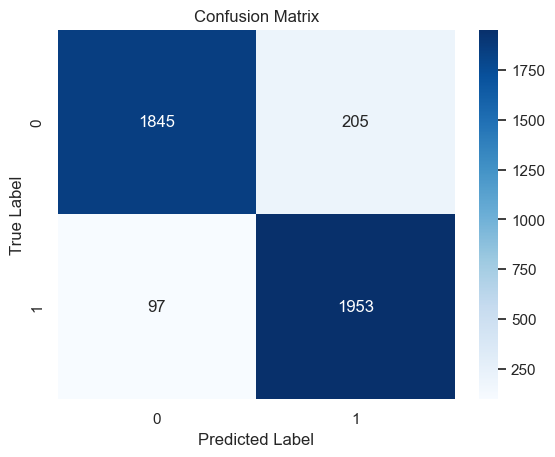

In [64]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

#Calculate F1 Score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9263414634146342
Precision: 0.9050046339202966
Recall: 0.9526829268292683
F1 Score: 0.928231939163498


In [66]:
from sklearn.metrics import roc_auc_score

# Calculate the Receiver Operating Characteristic Area Under the Curve (ROC-AUC) 
roc_auc = roc_auc_score(y_test, y_pred)

print("ROC-AUC:", roc_auc)

ROC-AUC: 0.9263414634146342


###  Support Vector Classifier (SVC) with non-linear kernel

In [67]:
# Import packages
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [68]:
# Initialize and train the SVC model with a non-linear RBF kernel
svc = SVC(kernel='rbf', random_state=1)
svc.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy (SVC): {accuracy_svc}')
print(classification_report(y_test, y_pred_svc))

Accuracy (SVC): 0.7007317073170731
              precision    recall  f1-score   support

           0       0.74      0.62      0.68      2050
           1       0.67      0.78      0.72      2050

    accuracy                           0.70      4100
   macro avg       0.71      0.70      0.70      4100
weighted avg       0.71      0.70      0.70      4100



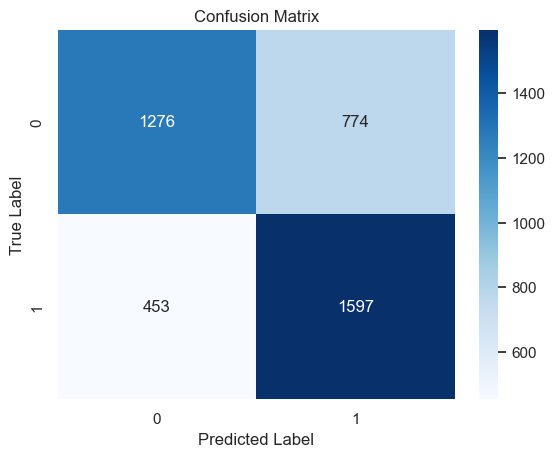

In [69]:
cm = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [70]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svc)

# Calculate precision
precision = precision_score(y_test, y_pred_svc)

# Calculate recall
recall = recall_score(y_test, y_pred_svc)

#Calculate F1 Score
f1 = f1_score(y_test, y_pred_svc)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7007317073170731
Precision: 0.6735554618304513
Recall: 0.7790243902439025
F1 Score: 0.7224609816783534


In [72]:
# Calculate the ROC-AUC
roc_auc2 = roc_auc_score(y_test, y_pred_svc)

print("ROC-AUC:", roc_auc2)

ROC-AUC: 0.7007317073170731


### Decision Tree Classifier 

In [71]:
# Import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [73]:
# Initialize and train the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy (DecisionTreeClassifier): {accuracy_dt}')
print(classification_report(y_test, y_pred_dt))

Accuracy (DecisionTreeClassifier): 0.8736585365853659
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2050
           1       0.87      0.88      0.87      2050

    accuracy                           0.87      4100
   macro avg       0.87      0.87      0.87      4100
weighted avg       0.87      0.87      0.87      4100



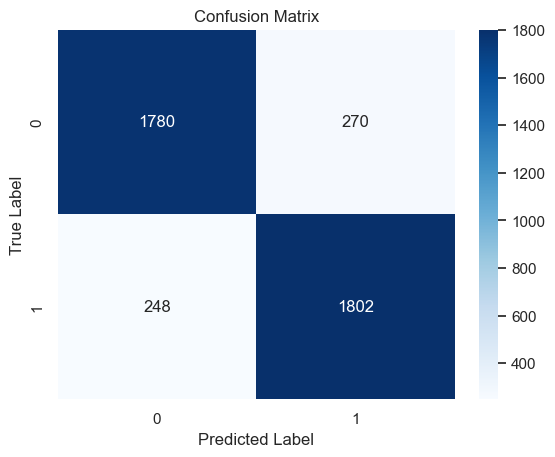

In [74]:
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [75]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)

# Calculate precision
precision = precision_score(y_test, y_pred_dt)

# Calculate recall
recall = recall_score(y_test, y_pred_dt)

#Calculate F1 Score
f1 = f1_score(y_test, y_pred_dt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8736585365853659
Precision: 0.8696911196911197
Recall: 0.8790243902439024
F1 Score: 0.8743328481319748


In [76]:
# Calculate the ROC-AUC
roc_auc3 = roc_auc_score(y_test, y_pred_dt)

print("ROC-AUC:", roc_auc3)

ROC-AUC: 0.8736585365853659


### K Neighbours Classifier 

In [77]:
# Import packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [78]:
# Initialize and train the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (KNeighborsClassifier): {accuracy_knn}')
print(classification_report(y_test, y_pred_knn))

Accuracy (KNeighborsClassifier): 0.818780487804878
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2050
           1       0.77      0.90      0.83      2050

    accuracy                           0.82      4100
   macro avg       0.83      0.82      0.82      4100
weighted avg       0.83      0.82      0.82      4100



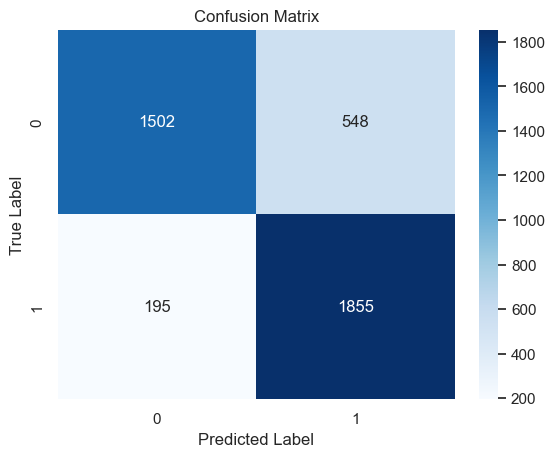

In [79]:
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [80]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# Calculate precision
precision = precision_score(y_test, y_pred_knn)

# Calculate recall
recall = recall_score(y_test, y_pred_knn)

#Calculate F1 Score
f1 = f1_score(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.818780487804878
Precision: 0.7719517270079068
Recall: 0.9048780487804878
F1 Score: 0.8331461935773636


In [81]:
# Calculate the ROC-AUC
roc_auc4 = roc_auc_score(y_test, y_pred_knn)

print("ROC-AUC:", roc_auc4)

ROC-AUC: 0.818780487804878


### Logistic Regression 

In [82]:
# Import packages
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

In [83]:
# Create a pipeline with PolynomialFeatures and LogisticRegression
logistic_regression_pipeline = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())

# Fit the pipeline to the training data
logistic_regression_pipeline.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_logistic = logistic_regression_pipeline.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy (LogisticRegression with polynomial features): {accuracy_logistic}')
print(classification_report(y_test, y_pred_logistic))

Accuracy (LogisticRegression with polynomial features): 0.8256097560975609
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2050
           1       0.85      0.79      0.82      2050

    accuracy                           0.83      4100
   macro avg       0.83      0.83      0.83      4100
weighted avg       0.83      0.83      0.83      4100



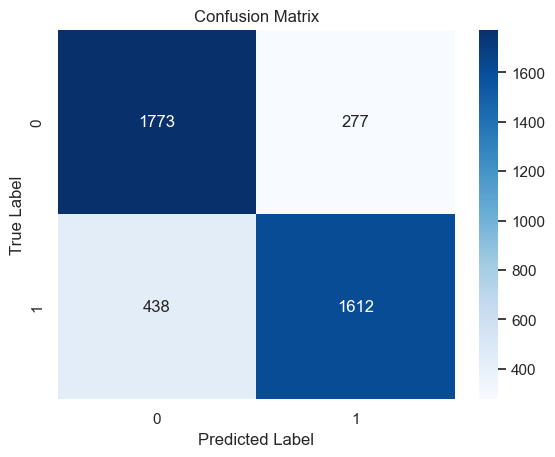

In [84]:
cm = confusion_matrix(y_test, y_pred_logistic)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [85]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)

# Calculate precision
precision = precision_score(y_test, y_pred_logistic)

# Calculate recall
recall = recall_score(y_test, y_pred_logistic)

#Calculate F1 Score
f1 = f1_score(y_test, y_pred_logistic)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8256097560975609
Precision: 0.853361566966649
Recall: 0.7863414634146342
F1 Score: 0.8184818481848185


In [86]:
# Calculate the ROC-AUC
roc_auc5 = roc_auc_score(y_test, y_pred_logistic)

print("ROC-AUC:", roc_auc5)

ROC-AUC: 0.825609756097561


### Models' Performance Comparison

### ROC Curve

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

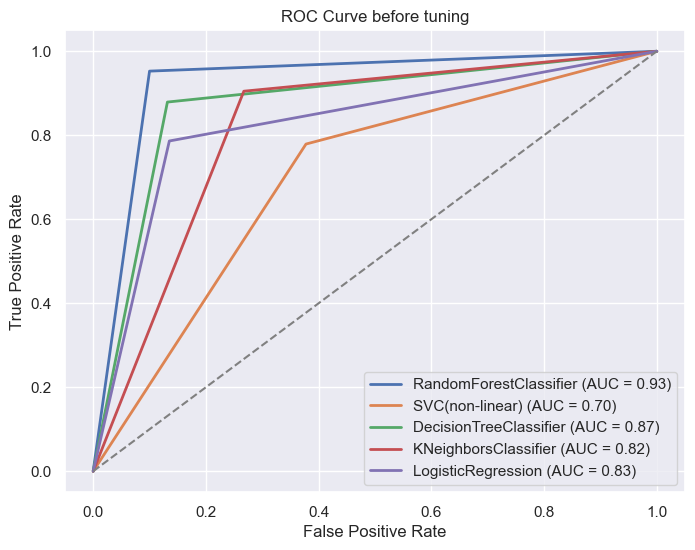

In [89]:
# create models list 
model_names = ['RandomForestClassifier', 'SVC(non-linear)','DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression']
mofrl_list = [y_pred, y_pred_svc, y_pred_dt, y_pred_knn, y_pred_logistic]

plt.figure(figsize=(8,6))

# Plot ROC curve for each model
for i in range(len(model_names)):
    fpr, tpr, _ = roc_curve(y_test, mofrl_list[i])
    roc_auc = roc_auc_score(y_test, mofrl_list[i])
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_names[i], roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve before tuning')
plt.legend(loc="lower right")
plt.show()

## Model Optimization 

### Hyperparameter Tuning for RandomForests 

In [90]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 500],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the trees
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=1)

# Perform grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy}')

Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.9295121951219513


### Hyperparameter Tuning for SVC

In [91]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.01, 0.1, 1],  # Kernel coefficient
}

# Initialize SVC with RBF kernel
svc = SVC(kernel='rbf', random_state=1)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_svc = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_svc = best_svc.predict(X_test)

# Evaluate model performance
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy (SVC): {accuracy_svc}')

Best Hyperparameters: {'C': 10, 'gamma': 0.1}
Accuracy (SVC): 0.8468292682926829


### Hyperparameter Tuning for DecisionTreeClassifier

In [92]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_dt = best_dt_classifier.predict(X_test)

# Evaluate model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy (Decision Tree): {accuracy_dt}')

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy (Decision Tree): 0.8985365853658537


### Hyperparameter Tuning for KNN

In [93]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric for the tree
}

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_knn = best_knn_classifier.predict(X_test)

# Evaluate model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy (KNN): {accuracy_knn}')

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy (KNN): 0.8619512195121951


### Hyperparameter Tuning for Logistic Regression

In [94]:
# Define the parameter grid
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],  # Degree of polynomial features
    'logisticregression__C': [0.1, 1, 10]  # Regularization parameter for logistic regression
}

# Define the logistic regression pipeline
logistic_regression_pipeline = make_pipeline(PolynomialFeatures(), LogisticRegression())

# Initialize GridSearchCV with logistic regression pipeline and parameter grid
grid_search = GridSearchCV(estimator=logistic_regression_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_logistic_regression_pipeline = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_logistic = best_logistic_regression_pipeline.predict(X_test)

# Evaluate model performance
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy (Logistic Regression): {accuracy_logistic}')

Best Hyperparameters: {'logisticregression__C': 10, 'polynomialfeatures__degree': 1}
Accuracy (Logistic Regression): 0.8592682926829268


### ROC Curve after optimization

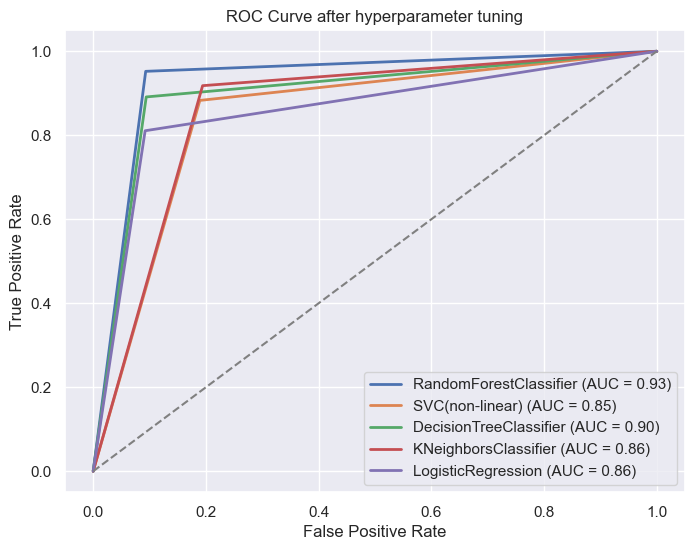

In [95]:
# create models list 
model_names = ['RandomForestClassifier', 'SVC(non-linear)','DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression']
mofrl_list = [y_pred, y_pred_svc, y_pred_dt, y_pred_knn, y_pred_logistic]

plt.figure(figsize=(8,6))

# Plot ROC curve for each model
for i in range(len(model_names)):
    fpr, tpr, _ = roc_curve(y_test, mofrl_list[i])
    roc_auc = roc_auc_score(y_test, mofrl_list[i])
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_names[i], roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after hyperparameter tuning')
plt.legend(loc="lower right")
plt.show()

## Feature Importances 

#### Check the feature importance from RandomForestClassifier model 

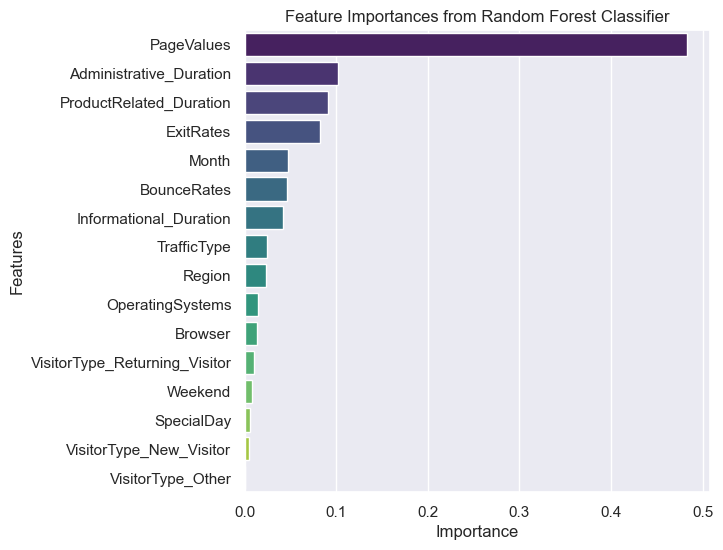

In [101]:
# Get feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Features': X_train.columns, 'Importance': feature_importances})

plt.figure(figsize=(6, 6))
sns.barplot(x="Importance", y="Features", data=importance_df.sort_values(by="Importance", ascending=False), palette="viridis")
plt.title("Feature Importances from Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

According to the graph, we can observe the following findings:

- 'PageValues' emerges as the most critical factor for categorizing types based on the Randon Forest Classifier. 
- Following 'ProductRelated_Duration', 'ExitRates' and 'Month' are significant, alongside 'Administrative_Duration' and 'BounceRates'. These metrics are key indicators for revenue conversion, reflecting user exits and product engagement.
- 'VisitorRype_Other', 'SpecialDay' and 'Weekend' are deemed the least influential variables in predicting outcomes according to this model. 

#### Check the feature importance from Decision Tree Classifier

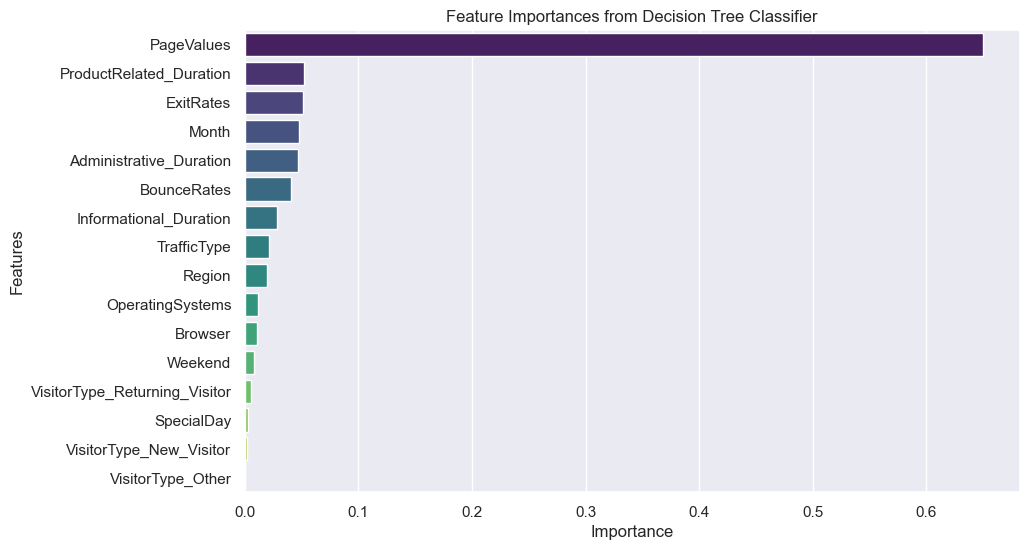

In [97]:
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Features': X_train.columns, 'Importance': feature_importances})

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Features", data=importance_df.sort_values(by="Importance", ascending=False), palette="viridis")
plt.title("Feature Importances from Decision Tree Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

The chart shows very similar results as for Random Forests.

### Ad-hoc explanation for RandomForestClassifier model (LIME) 

In [111]:
# Save the model into a file using the joblib package
# Load packages
from joblib import dump, load

In [113]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Use predict_proba to get the probabilities
class_probabilities = model.predict_proba(X_test)

In [114]:
#Dump the model into a joblib file
dump(model,'RFC.joblib')

['RFC.joblib']

In [115]:
#Load the model
model_from_file = load('RFC.joblib')

In [116]:
#Install the LIME package
!pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     -------------------------------------- 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=adc9d5a27c02dc16fd12eaccd0530234156a2c2ad91422dbeb37fa7e7ffa4b62
  Stored in directory: c:\users\s3063766\appdata\local\pip\cache\wheels\fd\a2\af\9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
# Import LIME package
import lime.lime_tabular

In [118]:
#Create an explainer using LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=X_train.columns,verbose=True, mode='classification')

In [119]:
#Create an explanation for a prediction
explanation = explainer.explain_instance(X_test.iloc[0], model.predict_proba)

Intercept 0.652708504432862
Prediction_local [0.2949585]
Right: 0.44


In [120]:
#Show the results of the explanation in the notebook
explanation.show_in_notebook(show_table=True)

In [121]:
# Extract the coefficients as a list
explanation.as_list()

[('PageValues <= 0.00', -0.5873232508030961),
 ('9.00 < Month <= 11.00', 0.11008222393991195),
 ('0.00 < Administrative_Duration <= 0.01', 0.038715245462232845),
 ('SpecialDay <= 0.00', 0.024523477397155106),
 ('0.01 < ProductRelated_Duration <= 0.01', 0.020297915298870574),
 ('0.01 < BounceRates <= 0.05', 0.019527912905168074),
 ('OperatingSystems <= 2.00', 0.010326371792910809),
 ('Weekend > 0.00', -0.009212859530643552),
 ('0.10 < ExitRates <= 0.17', 0.007944479899188001),
 ('Browser <= 2.00', 0.00736847996962916)]

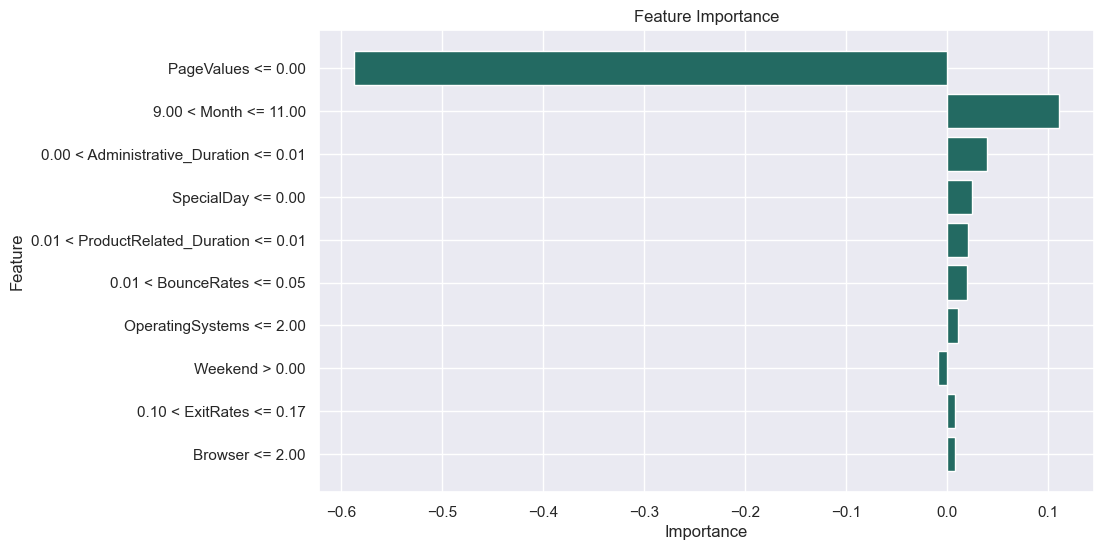

In [122]:
# Get feature names and importances
features, importances = zip(*explanation.as_list())

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='#236A62')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()